In [2]:
# 抓取資料
!wget -c https://ai100-fileentity.cupoy.com/ml100/homework/data/1582795766653/titanic_test.csv?t=1582795815962 -O titanic_test.csv
!wget -c https://ai100-fileentity.cupoy.com/ml100/homework/data/1582795766653/titanic_train.csv?t=1582795819472 -O titanic_train.csv

--2020-07-28 12:43:28--  https://ai100-fileentity.cupoy.com/ml100/homework/data/1582795766653/titanic_test.csv?t=1582795815962
Resolving ai100-fileentity.cupoy.com (ai100-fileentity.cupoy.com)... 13.35.111.78, 13.35.111.98, 13.35.111.91, ...
Connecting to ai100-fileentity.cupoy.com (ai100-fileentity.cupoy.com)|13.35.111.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28210 (28K) [application/octet-stream]
Saving to: ‘titanic_test.csv’

titanic_test.csv    100%[===================>]  27.55K  --.-KB/s    in 0.01s   

2020-07-28 12:43:28 (1.92 MB/s) - ‘titanic_test.csv’ saved [28210/28210]

--2020-07-28 12:43:30--  https://ai100-fileentity.cupoy.com/ml100/homework/data/1582795766653/titanic_train.csv?t=1582795819472
Resolving ai100-fileentity.cupoy.com (ai100-fileentity.cupoy.com)... 13.35.111.98, 13.35.111.78, 13.35.111.91, ...
Connecting to ai100-fileentity.cupoy.com (ai100-fileentity.cupoy.com)|13.35.111.98|:443... connected.
HTTP request sent, awaiting res

In [5]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


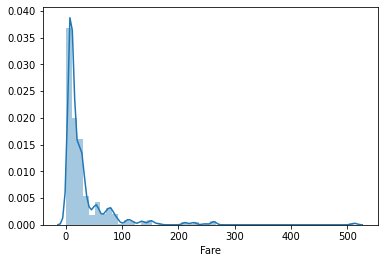

In [7]:
# 顯示 Fare 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Fare'][:train_num])
plt.show()

In [8]:
# 計算基礎分數
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7015378821166279

# 作業1  
試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

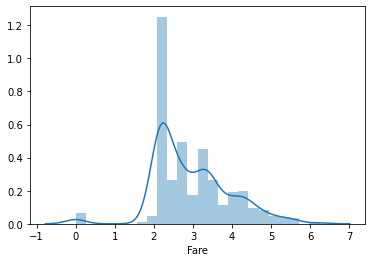

0.710545477371163

In [9]:
# 將 Fare 取 log1p 後, 看散佈圖, 並計算分數
df_fixed = copy.deepcopy(df)
"""
Your Code Here, transform df_fixed['Fare'] with log1p
"""
df_fixed['Fare']=np.log1p(df_fixed['Fare'])

sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# 作業2  
最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

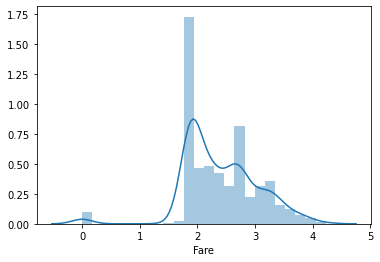

0.7094218818655451

In [22]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正)
from scipy import stats
df_fixed = copy.deepcopy(df)
"""
Your Code Here, fix the error
"""
df_fixed['Fare']=df_fixed['Fare']+1

df_fixed['Fare'] = stats.boxcox(df_fixed['Fare'])[0]
sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()